Calculating Option Premiums for correlated baskets of stocks.

In [80]:
import pandas as pd
import numpy as np
import statistics
from statistics import mean
import matplotlib.pyplot as plt
import random

In [81]:
#Here I create the correlation matrix.

In [82]:
cor = np.zeros((10,10))

for i in range(10):
    for j in range(10):

        cor[i,j] = 0.9**abs(i-j)

In [83]:
#This is a visual of the correlations.

Text(0.5, 15.0, 'Stocks')

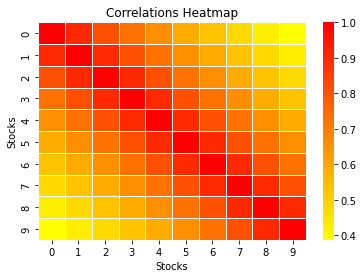

In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(cor, linewidth=0.5, cmap = 'autumn_r')
ax.set_title('Correlations Heatmap')
ax.set_ylabel('Stocks')
ax.set_xlabel('Stocks')

In [148]:
#Here I initialize the variables

S_0 = 100
sigma = 0.3
T = 1 #Here one year one period
K = 100

cov = sigma**2 * T * cor

rng = np.random.multivariate_normal(mean=np.zeros(10), cov=cov, size=1000000)
#I generate the paths

S_T = S_0 * np.exp(rng - (sigma**2)/2)
#And apply them to our initial stock value

P_T = np.mean(S_T, axis=1)
#This is the average price of the stocks at time T

payoffs = np.maximum(P_T-K, 0)
#We get the payoffs for each of the 1000000 runs.

basket_price_T = np.mean(payoffs)
#And the average of those payoffs is what is EV of this option at time T

basket_price_T
#Since no interest rate this is also the current option premium.

10.199885426048576

In [149]:
np.quantile(basket_price_T-payoffs, 0.05)

-37.44902065555341

In [87]:
#Here is the total loss that should not be exceeded in 95% of cases.

In [150]:
np.mean(S_T, axis =1)

array([ 57.96357111, 113.59489968, 113.11026842, ...,  94.67104735,
        61.10018932, 146.73276431])

In [151]:
np.mean(P_T)

100.01139302459242